In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [2]:
axis = pd.read_csv('AXISBANK.csv')
hdfc = pd.read_csv('HDFCBANK.csv')
icici = pd.read_csv('ICICIBANK.csv')
kotak = pd.read_csv('KOTAKBANK.csv')
bankname_list = ["AXIS", "HDFC", "ICICI", "KOTAK"]

In [3]:
hdfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5141 entries, 0 to 5140
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5141 non-null   object 
 1   Symbol              5141 non-null   object 
 2   Series              5141 non-null   object 
 3   Prev Close          5141 non-null   float64
 4   Open                5141 non-null   float64
 5   High                5141 non-null   float64
 6   Low                 5141 non-null   float64
 7   Last                5141 non-null   float64
 8   Close               5141 non-null   float64
 9   VWAP                5141 non-null   float64
 10  Volume              5141 non-null   int64  
 11  Turnover            5141 non-null   float64
 12  Trades              2291 non-null   float64
 13  Deliverable Volume  4632 non-null   float64
 14  %Deliverble         4632 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 602.6

In [4]:
bank_list = [axis, hdfc, icici, kotak]
bank_name = ["AXIS", "HDFC", "ICICI", "KOTAK"]


for bank, bank_name in zip(bank_list, bank_name):
    bank["bank_name"] = bank_name
    bank.set_index("Date", drop=False, inplace=True)

df = pd.concat(bank_list, axis=0)

In [5]:
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,bank_name
Date,,,,,,,,,,,,,,,,
2020-08-25,2020-08-25,KOTAKBANK,EQ,1387.25,1392.0,1405.00,1380.55,1402.50,1400.10,1392.98,4562238,6.355086e+14,113271.0,1707481.0,0.3743,KOTAK
2020-08-26,2020-08-26,KOTAKBANK,EQ,1400.10,1410.0,1441.65,1403.20,1440.70,1436.70,1422.98,5718774,8.137705e+14,129864.0,2634770.0,0.4607,KOTAK
2020-08-27,2020-08-27,KOTAKBANK,EQ,1436.70,1441.0,1445.85,1411.55,1424.75,1420.00,1426.61,4283671,6.111131e+14,115968.0,1916974.0,0.4475,KOTAK
2020-08-28,2020-08-28,KOTAKBANK,EQ,1420.00,1410.0,1474.00,1401.00,1472.55,1467.10,1439.80,10645875,1.532798e+15,253350.0,4422762.0,0.4154,KOTAK
2020-08-31,2020-08-31,KOTAKBANK,EQ,1467.10,1488.0,1501.50,1374.00,1398.00,1401.35,1430.63,6973853,9.976979e+14,204986.0,2255142.0,0.3234,KOTAK


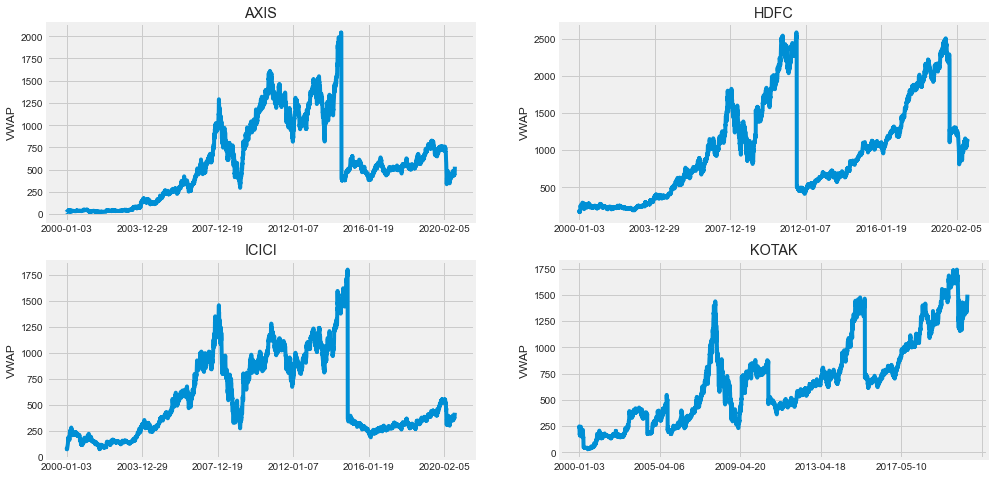

In [6]:
# Let's see a historical view of the VWAP

plt.figure(figsize=(15, 8))
plt.subplots_adjust()

for i, bank in enumerate(bank_list, 1):
    plt.subplot(2, 2, i)
    bank['High'].plot()
    plt.ylabel('VWAP')
    plt.xlabel(None)
    plt.title(f"{bankname_list[i-1]}")

In [7]:
ma_day = [4,16,28,40]

for ma in ma_day:
    for bank in bank_list:
        column_name = f"MA for {ma} days"
        bank[column_name] = bank['VWAP'].rolling(ma).mean()

In [8]:
axis.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,bank_name,MA for 4 days,MA for 16 days,MA for 28 days,MA for 40 days
Date,,,,,,,,,,,,,,,,,,,,
2000-01-03,2000-01-03,UTIBANK,EQ,24.70,26.7,26.70,26.70,26.7,26.70,26.70,112100,2.993070e+11,NaN,NaN,NaN,AXIS,NaN,NaN,NaN,NaN
2000-01-04,2000-01-04,UTIBANK,EQ,26.70,27.0,28.70,26.50,27.0,26.85,27.24,234500,6.387275e+11,NaN,NaN,NaN,AXIS,NaN,NaN,NaN,NaN
2000-01-05,2000-01-05,UTIBANK,EQ,26.85,26.0,27.75,25.50,26.4,26.30,26.24,170100,4.462980e+11,NaN,NaN,NaN,AXIS,NaN,NaN,NaN,NaN
2000-01-06,2000-01-06,UTIBANK,EQ,26.30,25.8,27.00,25.80,25.9,25.95,26.27,102100,2.681730e+11,NaN,NaN,NaN,AXIS,26.6125,NaN,NaN,NaN
2000-01-07,2000-01-07,UTIBANK,EQ,25.95,25.0,26.00,24.25,25.0,24.80,25.04,62600,1.567220e+11,NaN,NaN,NaN,AXIS,26.1975,NaN,NaN,NaN


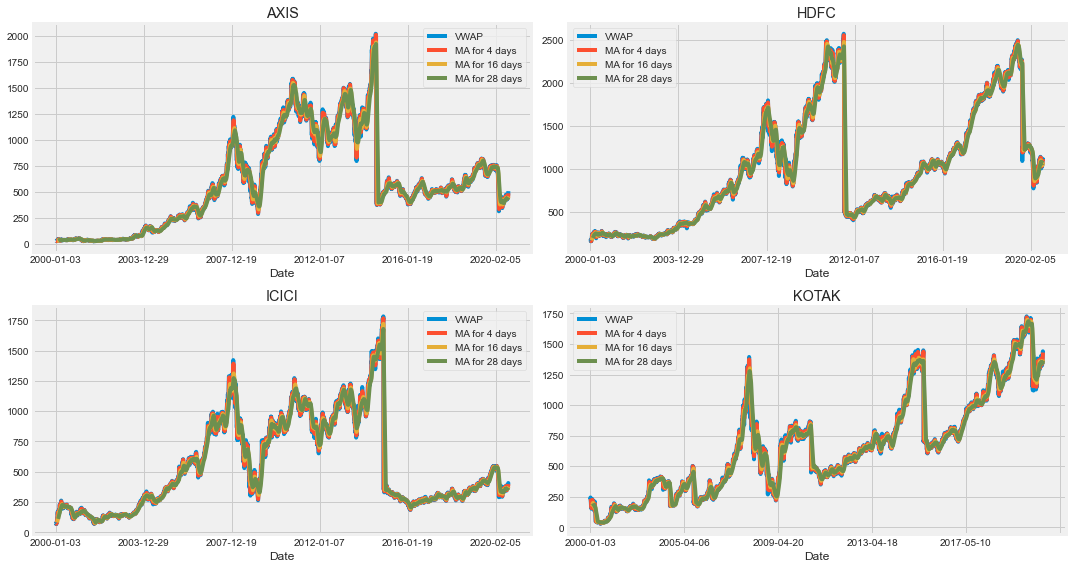

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

axis[['VWAP', 'MA for 4 days', 'MA for 16 days', 'MA for 28 days']].plot(ax=axes[0,0])
axes[0,0].set_title('AXIS')

hdfc[['VWAP', 'MA for 4 days', 'MA for 16 days', 'MA for 28 days']].plot(ax=axes[0,1])
axes[0,1].set_title('HDFC')

icici[['VWAP', 'MA for 4 days', 'MA for 16 days', 'MA for 28 days']].plot(ax=axes[1,0])
axes[1,0].set_title('ICICI')

kotak[['VWAP', 'MA for 4 days', 'MA for 16 days', 'MA for 28 days']].plot(ax=axes[1,1])
axes[1,1].set_title('KOTAK')


fig.tight_layout()

Correlation between different banks Closing prices

In [10]:
axisClose = axis[['Close']].copy()
axisClose.rename(columns={'Close': 'axis'}, inplace=True)
hdfcClose = hdfc[['Close']].copy()
hdfcClose.rename(columns={'Close': 'hdfc'}, inplace=True)
iciciClose = icici[['Close']].copy()
iciciClose.rename(columns={'Close': 'icici'}, inplace=True)
kotakClose = kotak[['Close']].copy()
kotakClose.rename(columns={'Close': 'kotak'}, inplace=True)

closing_df = pd.concat([axisClose,hdfcClose,iciciClose,kotakClose], axis=1, sort=False)

In [11]:
closing_df.head()

,axis,hdfc,icici,kotak
2000-01-03,26.70,170.00,74.75,229.35
2000-01-04,26.85,173.80,73.05,246.95
2000-01-05,26.30,166.95,69.50,228.40
2000-01-06,25.95,168.30,70.05,225.90
2000-01-07,24.80,168.35,67.40,208.85


Using pct_change to find the percent change for each day Closing prices i.e. Daily returns

In [12]:
daily_returns = closing_df.pct_change()
daily_returns.head()

,axis,hdfc,icici,kotak
2000-01-03,NaN,NaN,NaN,NaN
2000-01-04,0.005618,0.022353,-0.022742,0.076739
2000-01-05,-0.020484,-0.039413,-0.048597,-0.075116
2000-01-06,-0.013308,0.008086,0.007914,-0.010946
2000-01-07,-0.044316,0.000297,-0.037830,-0.075476


Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of banks in our bank list. Using sns.pairplot() to automatically create the plot with all the correlations

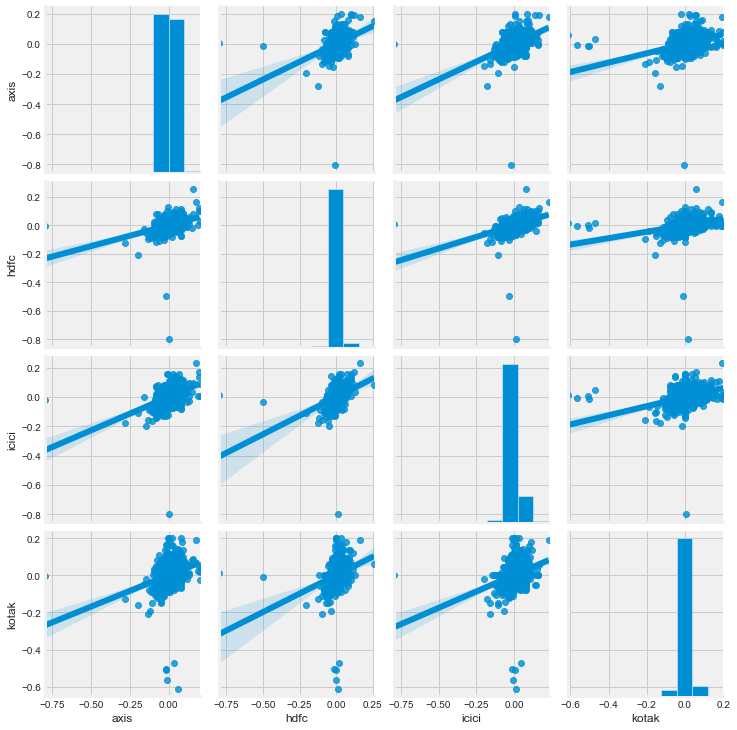

In [13]:
sns.pairplot(daily_returns, kind='reg')

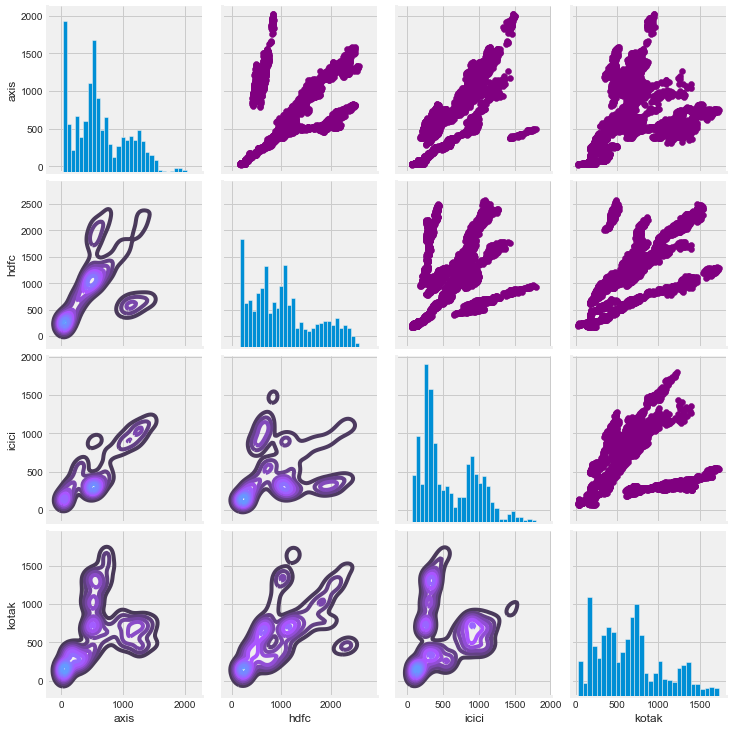

In [14]:
# setting up the figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(closing_df.dropna())

# Using map_upper to specify scatters in the upper part
return_fig.map_upper(plt.scatter, color='purple')

# Defining the lower triangle to specify kdeplots in the lower part
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# defining the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

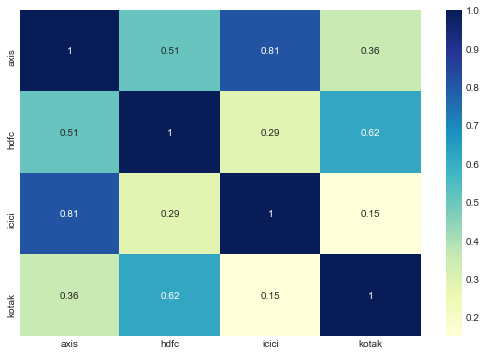

In [15]:
plt.figure(figsize = (8, 6))
sns.heatmap(closing_df.corr(), annot=True, cmap='YlGnBu')
plt.show()

Just like PairPlot, here we can see numerically and visually that ICICI and AXIS had the strongest correlation of daily stock return. It's also interesting to see that all the banks are positively correlated.

Comparing Expected returns with Standard deviations which gives the Risk factor for investing in a particular stock

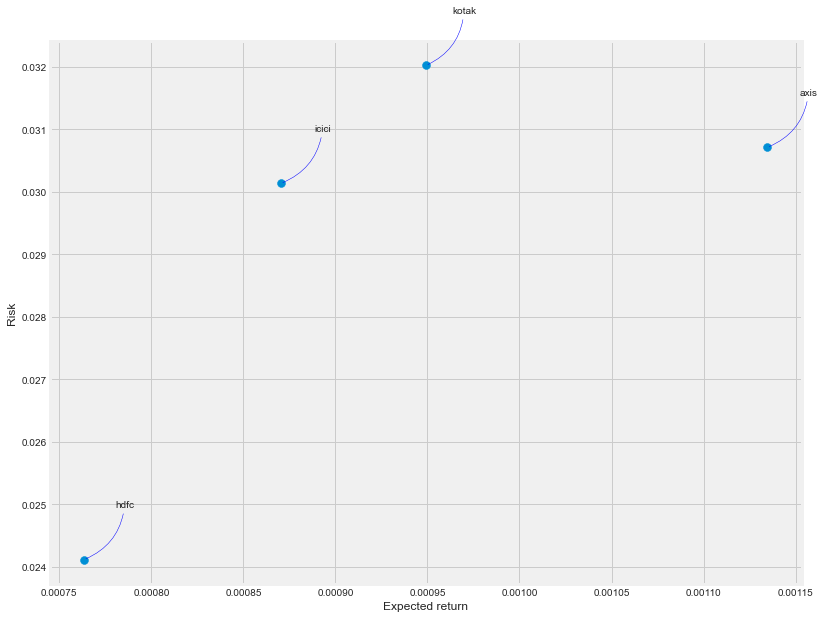

In [16]:
returns = daily_returns.dropna()

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(returns.mean(), returns.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(returns.columns, returns.mean(), returns.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))